In [1]:
import pandas as pd

import re

In [2]:
flat = pd.read_csv(r"D:\my prepared dataset\99 acres\New folder\flats_cleaned.csv")

In [3]:
flat.head(4)

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2.0,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN


# then

In [4]:
super1 = []

In [5]:
pattern = r'Super Built up area (\d+)\(([\d.]+) sq\.m\.\)'


In [6]:
for i in flat['areaWithType']:
    if 'Super' in i:
        match = re.search(pattern, i)
        if match:
            super1.append(match.group()) 
        else:
            super1.append('0')
    else:
        super1.append('0')


In [7]:
Build = []
pattern2 = r'Built Up area: (\d+) sq\.ft\.'

In [8]:
for i in flat['areaWithType']:
    if 'Built' in i:
        match = re.search(pattern2, i)
        if match:
            Build.append(match.group()) 
        else:
            Build.append('0')
    else:
        Build.append('0')

In [9]:
carpet = []
pattern3 = r'Carpet area: (\d+) sq\.ft\.'

In [10]:
for i in flat['areaWithType']:
    if 'Carpet' in i:
        match = re.search(pattern3, i)
        if match:
            carpet.append(match.group()) 
        else:
            carpet.append('0')
    else:
        carpet.append('0')

In [11]:

flat['super'] = super1


In [12]:
flat['carpet'] = carpet

In [13]:
flat['Build'] = Build

In [14]:
flat['BHK'] = flat['property_name'].str.split().str.get(0)
flat['Type_of_Prperty']= flat['property_name'].str.split().str.get(2)

In [15]:
flat['Location'] = flat['property_name'].str.split(n=4).str.get(4)

In [16]:
flat['Location'] = flat['Location'].str.replace('Gurgaon', '').str.strip()

In [17]:
flat1 = flat.drop(['property_name','area'], axis=1)

In [18]:
first = flat1['additionalRoom'].str.split(',').str.get(0)
second = flat1['additionalRoom'].str.split(',').str.get(1)
Thrid = flat1['additionalRoom'].str.split(',').str.get(2)
fourth = flat1['additionalRoom'].str.split(',').str.get(3)

In [19]:
second1 = second.fillna(0)


In [20]:
servant_room2 = []

In [21]:
for i in second1:
    if 'servant room' == i:
        servant_room2.append(1)
    else:
        servant_room2.append(0)
   

In [22]:
servant = pd.DataFrame(servant_room2)

In [23]:
servant[0] = pd.to_numeric(servant[0])


In [24]:
for index, i in enumerate(Thrid):
    if 'servant room' == i:
        servant[0].loc[index] = servant[0].loc[index] = 1
    else:
        pass

In [25]:
for index, i in enumerate(fourth):
    if 'servant room' == i:
        servant[0].loc[index] = servant[0].loc[index] = 1
    else:
        pass

In [26]:
for index, i in enumerate(first):
    if 'servant room' == i:
        servant[0].loc[index] = servant[0].loc[index] = 1
    else:
        pass

In [27]:
servant[0].value_counts()

0
0    1997
1    1000
Name: count, dtype: int64

# Second

In [28]:
study = []

In [29]:
for i in first:
    if 'study room' == i:
        study.append(1)
    else:
        study.append(0)

In [30]:
study1 = pd.DataFrame(study)

In [31]:
study1[0].value_counts()

0
0    2627
1     370
Name: count, dtype: int64

In [32]:
for index, i in enumerate(second):
    if 'study room' == i:
        study1[0].loc[index] = study1[0].loc[index] = 1
    else:
        pass

In [33]:
study1[0].value_counts()

0
0    2526
1     471
Name: count, dtype: int64

In [34]:
for index, i in enumerate(Thrid):
    if 'study room' == i:
        study1[0].loc[index] = study1[0].loc[index] = 1
    else:
        pass

In [35]:
study1[0].value_counts()

0
0    2517
1     480
Name: count, dtype: int64

In [36]:
for index, i in enumerate(fourth):
    if 'study room' == i:
        study1[0].loc[index] = study1[0].loc[index] = 1
    else:
        pass

In [37]:
study1[0].value_counts()

0
0    2516
1     481
Name: count, dtype: int64

# Third

In [38]:
pooja  = []

In [39]:
for i in first:
    if 'pooja room' == i:
        pooja.append(1)
    else:
        pooja.append(0)

In [40]:
pooja1 = pd.DataFrame(pooja)

In [41]:
for index, i in enumerate(second):
    if 'pooja room' == i:
        pooja1[0].loc[index] = pooja1[0].loc[index] = 1
    else:
        pass

In [42]:
for index, i in enumerate(Thrid):
    if 'pooja room' == i:
        pooja1[0].loc[index] = pooja1[0].loc[index] = 1
    else:
        pass

In [43]:
pooja1[0].value_counts()

0
0    2638
1     359
Name: count, dtype: int64

In [44]:
for index, i in enumerate(fourth):
    if 'pooja room' == i:
        pooja1[0].loc[index] = pooja1[0].loc[index] = 1
    else:
        pass

In [45]:
pooja1[0].value_counts()

0
0    2635
1     362
Name: count, dtype: int64

# Fourth 

In [46]:
store = []

In [47]:
first.value_counts()

additionalRoom
not available    1305
servant room      758
study room        370
pooja room        296
others            186
store room         82
Name: count, dtype: int64

In [48]:
for i in first:
    if 'store room' == i:
        store.append(1)
    else:
        store.append(0)

In [49]:
store1 = pd.DataFrame(store)

In [50]:
for index, i in enumerate(second):
    if 'store room' == i:
        store1[0].loc[index] = store1[0].loc[index] = 1
    else:
        pass

In [51]:
store1[0].value_counts()

0
0    2885
1     112
Name: count, dtype: int64

In [52]:
for index, i in enumerate(Thrid):
    if 'store room' == i:
        store1[0].loc[index] = store1[0].loc[index] = 1
    else:
        pass

In [53]:
for index, i in enumerate(fourth):
    if 'store room' == i:
        store1[0].loc[index] = store1[0].loc[index] = 1
    else:
        pass

In [54]:
store1[0].value_counts()

0
0    2839
1     158
Name: count, dtype: int64

# Other

In [55]:
first.value_counts()

additionalRoom
not available    1305
servant room      758
study room        370
pooja room        296
others            186
store room         82
Name: count, dtype: int64

In [56]:
other = []

In [57]:
for i in first:
    if 'others' == i:
        other.append(1)
    else:
        other.append(0)

In [58]:
other1  = pd.DataFrame(other)

In [59]:
other1.value_counts()

0    2811
1     186
Name: count, dtype: int64

In [60]:
for index, i in enumerate(second):
    if 'others' == i:
        other1[0].loc[index] = other1[0].loc[index] = 1
    else:
        pass

In [61]:
for index, i in enumerate(Thrid):
    if 'others' == i:
        other1[0].loc[index] = other1[0].loc[index] = 1
    else:
        pass

In [62]:
other1.value_counts()

0    2708
1     289
Name: count, dtype: int64

In [63]:
for index, i in enumerate(fourth):
    if 'others' == i:
        other1[0].loc[index] = other1[0].loc[index] = 1
    else:
        pass

In [64]:
other1[0].value_counts()

0
0    2683
1     314
Name: count, dtype: int64

In [65]:
flat1['Other'] = other1

In [66]:
flat1['servant'] = servant[0]
flat1['Store'] = store1[0]

In [67]:
pooja1[0].value_counts()

0
0    2635
1     362
Name: count, dtype: int64

In [68]:
flat1['Pooja'] = pooja1[0]

# Build

In [69]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [70]:
flat1['features']

0       ['Feng Shui / Vaastu Compliant', 'Security / F...
1       ['Security / Fire Alarm', 'Maintenance Staff',...
2       ['Power Back-up', 'Feng Shui / Vaastu Complian...
3       ['Security / Fire Alarm', 'Private Garden / Te...
4                                                     NaN
                              ...                        
2992                                                  NaN
2993    ['Security / Fire Alarm', 'Private Garden / Te...
2994    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
2995    ['Security / Fire Alarm', 'Private Garden / Te...
2996    ['Security / Fire Alarm', 'Power Back-up', 'In...
Name: features, Length: 2997, dtype: object

In [71]:

flat1['features_list'] = flat1['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

In [72]:
mlb = MultiLabelBinarizer()

In [73]:
matrix = mlb.fit_transform(flat1['features_list'])

In [74]:
matrix.shape

(2997, 32)

In [75]:
feature_matrix = pd.DataFrame(matrix, columns=mlb.classes_)

In [76]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(feature_matrix)
    wcss.append(kmeans.inertia_)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [77]:
k = range(1,11)

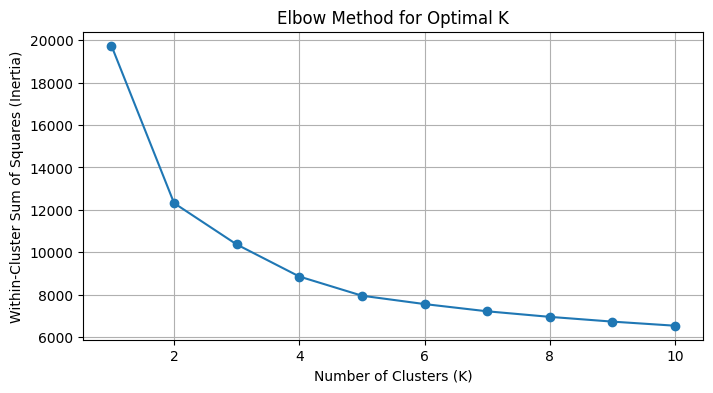

In [78]:
plt.figure(figsize=(8, 4))
plt.plot(k, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()

In [79]:
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [80]:
items = ['Airy Rooms', 'Bank Attached Property', 'Centrally Air Conditioned',
       'Club house / Community Center', 'False Ceiling Lighting',
       'Feng Shui / Vaastu Compliant', 'Fitness Centre / GYM',
       'High Ceiling Height', 'Intercom Facility',
       'Internet/wi-fi connectivity', 'Lift(s)', 'Low Density Society',
       'Maintenance Staff', 'Natural Light', 'No open drainage around', 'Park',
       'Piped-gas', 'Power Back-up', 'Private Garden / Terrace',
       'Rain Water Harvesting', 'Recently Renovated', 'Security / Fire Alarm',
       'Security Personnel', 'Separate entry for servant room',
       'Shopping Centre', 'Spacious Interiors', 'Swimming Pool',
       'Visitor Parking', 'Waste Disposal', 'Water Storage', 'Water purifier',
       'Water softening plant']

In [81]:
new_dict = {item: weights.get(item, 0) for item in items}

In [82]:
new_dict

{'Airy Rooms': 8,
 'Bank Attached Property': 0,
 'Centrally Air Conditioned': 9,
 'Club house / Community Center': 0,
 'False Ceiling Lighting': 6,
 'Feng Shui / Vaastu Compliant': 5,
 'Fitness Centre / GYM': 8,
 'High Ceiling Height': 8,
 'Intercom Facility': 7,
 'Internet/wi-fi connectivity': 7,
 'Lift(s)': 0,
 'Low Density Society': 7,
 'Maintenance Staff': 6,
 'Natural Light': 8,
 'No open drainage around': 0,
 'Park': 8,
 'Piped-gas': 0,
 'Power Back-up': 0,
 'Private Garden / Terrace': 9,
 'Rain Water Harvesting': 7,
 'Recently Renovated': 0,
 'Security / Fire Alarm': 9,
 'Security Personnel': 9,
 'Separate entry for servant room': 8,
 'Shopping Centre': 7,
 'Spacious Interiors': 9,
 'Swimming Pool': 8,
 'Visitor Parking': 7,
 'Waste Disposal': 0,
 'Water Storage': 7,
 'Water purifier': 7,
 'Water softening plant': 0}

In [83]:
luxury_score = feature_matrix[list(new_dict.keys())].multiply(list(new_dict.values())).sum(axis=1)

In [84]:
luxury_score

0        28
1        37
2        36
3        76
4         0
       ... 
2992      0
2993     71
2994     95
2995     68
2996    125
Length: 2997, dtype: int64

In [85]:
flat1['luxury_score'] = luxury_score

# furnishDetails

In [86]:
flat1.columns

Index(['property_type', 'society', 'price', 'price_per_sqft', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations', 'description',
       'furnishDetails', 'features', 'rating', 'super', 'carpet', 'Build',
       'BHK', 'Type_of_Prperty', 'Location', 'Other', 'servant', 'Store',
       'Pooja', 'features_list', 'luxury_score'],
      dtype='object')

In [87]:
ind = flat1['furnishDetails'].str.split('No').str.get(0)

In [88]:
leader = ind.str.split(',', expand=True)

In [89]:
leader

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,['3 Fan','4 Light','1 Wardrobe',',None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,['3 Wardrobe','4 Fan','1 Exhaust Fan','1 Geyser','3 Light','1 Curtains','1 Chimney','1 Modular Kitchen',',None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2994,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2995,['1 Water Purifier','10 Fan','1 Fridge','1 Exhaust Fan','5 Geyser','1 Stove','25 Light','7 AC','1 Modular Kitchen','1 Chimney','1 Curtains','4 Wardrobe','1 Sofa',',None,None,None,None


In [90]:
process = pd.read_csv(r"D:\my prepared dataset\99 acres\New folder (2)\New folder\process_flat.csv")

In [91]:
process = process.fillna(0)

In [92]:
process

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,3 Fan,4 Light,1 Wardrobe,,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3 Wardrobe,4 Fan,1 Exhaust Fan,1 Geyser,3 Light,1 Curtains,1 Chimney,1 Modular Kitchen,,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2994,],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2995,1 Water Purifier,10 Fan,1 Fridge,1 Exhaust Fan,5 Geyser,1 Stove,25 Light,7 AC,1 Modular Kitchen,1 Chimney,1 Curtains,4 Wardrobe,1 Sofa,,0,0,0,0


In [93]:
fan1 = []
Wardrobe1 = []
Bed1 = []

Water1 = []
AC1 = []
Geyser1 = []
Fridge1 = []
Light1 = []
Modular_Kitchen1 = []
Chimney1 = []
Exhaust_Fan1 = []
Curtains1 = []
Washing1 = []
TV1 = []
Stove1 = []

In [94]:
fan1 = [i* 0 for i in range(2997)]
Wardrobe1 = [i* 0 for i in range(2997)]
Bed1 = [i* 0 for i in range(2997)]
Water1 = [i* 0 for i in range(2997)]
AC1 = [i* 0 for i in range(2997)]
Geyser1 = [i* 0 for i in range(2997)]
Fridge1 = [i* 0 for i in range(2997)]
Light1 = [i* 0 for i in range(2997)]
Modular_Kitchen1 = [i* 0 for i in range(2997)]
Chimney1 = [i* 0 for i in range(2997)]
Exhaust_Fan1 = [i* 0 for i in range(2997)]

Curtains1 = [i* 0 for i in range(2997)]
Washing1 = [i* 0 for i in range(2997)]
TV1 = [i* 0 for i in range(2997)]
Stove1 = [i* 0 for i in range(2997)]

In [95]:
fan = pd.DataFrame(fan1)
Wardrobe = pd.DataFrame(Wardrobe1)
Bed = pd.DataFrame(Bed1)
Water = pd.DataFrame(Water1)
AC = pd.DataFrame(AC1)
Geyser = pd.DataFrame(Geyser1)

Fridge = pd.DataFrame(Fridge1)
Light = pd.DataFrame(Light1)
Modular_Kitchen = pd.DataFrame(Modular_Kitchen1)
Chimney = pd.DataFrame(Chimney1)
Exhaust_Fan = pd.DataFrame(Exhaust_Fan1)

Curtains = pd.DataFrame(Curtains1)
Washing = pd.DataFrame(Washing1)
TV = pd.DataFrame(TV1)
Stove = pd.DataFrame(Stove1)

In [96]:
for index, i in enumerate(process['0']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
    #,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,   
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [97]:
Dining_Table1 = []
Microwave1 = []
Sofa1 = []

In [98]:
Dining_Table1 = [i* 0 for i in range(2997)]
Microwave1 = [i* 0 for i in range(2997)]
Sofa1 = [i* 0 for i in range(2997)]

In [99]:
Dining_Table = pd.DataFrame(Dining_Table1)
Microwave = pd.DataFrame(Microwave1)
Sofa = pd.DataFrame(Sofa1)

In [100]:
for index, i in enumerate(process['1']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i



In [101]:
for index, i in enumerate(process['2']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [102]:
for index, i in enumerate(process['3']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [103]:
for index, i in enumerate(process['4']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [104]:
for index, i in enumerate(process['5']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [105]:
for index, i in enumerate(process['6']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [106]:
for index, i in enumerate(process['7']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [107]:
for index, i in enumerate(process['8']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [108]:
for index, i in enumerate(process['9']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [109]:
for index, i in enumerate(process['10']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [110]:
for index, i in enumerate(process['11']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [111]:
for index, i in enumerate(process['12']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [112]:
for index, i in enumerate(process['13']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [113]:
for index, i in enumerate(process['14']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [114]:
for index, i in enumerate(process['15']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [115]:
for index, i in enumerate(process['16']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [116]:
for index, i in enumerate(process['17']):
    if isinstance(i, str) and 'Wardrobe' in i:
        Wardrobe[0].loc[index] = i
    elif isinstance(i, str) and 'Bed' in i:
        Bed[0].loc[index] = i
    elif isinstance(i, str) and 'Fan' in i and 'Exhaust' not in i:
        fan[0].loc[index] = i
    
    elif isinstance(i, str) and 'Water Purifier' in i:
        Water[0].loc[index] = i
    elif isinstance(i, str) and 'AC' in i:
        AC[0].loc[index] = i
    elif isinstance(i, str) and 'Geyser' in i:
        Geyser[0].loc[index] = i
        
    elif isinstance(i, str) and 'Fridge' in i:
        Fridge[0].loc[index] = i
    elif isinstance(i, str) and 'Light' in i:
        Light[0].loc[index] = i
    elif isinstance(i, str) and 'Kitchen' in i:
        Modular_Kitchen[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Chimney' in i:
        Chimney[0].loc[index] = i
    
    elif isinstance(i, str) and 'Sofa' in i:
        Sofa[0].loc[index] = i
    elif isinstance(i, str) and 'Dining Table' in i:
        Dining_Table[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'Microwave' in i:
        Microwave[0].loc[index] = i
    elif isinstance(i, str) and 'Exhaust' in i:
        Exhaust_Fan[0].loc[index] = i
        
    elif isinstance(i, str) and 'Curtains' in i:
        Curtains[0].loc[index] = i
    elif isinstance(i, str) and 'Washing' in i:
        Washing[0].loc[index] = i
    
    
    elif isinstance(i, str) and 'TV' in i:
        TV[0].loc[index] = i
    elif isinstance(i, str) and 'Stove' in i:
        Stove[0].loc[index] = i


In [117]:
single = pd.DataFrame()

In [118]:
single['Wardrobe'] = Wardrobe[0]
single['Bed'] = Bed[0]
single['fan'] = fan[0]
single['Water'] = Water[0]
single['AC'] = AC[0]

single['Geyser'] = Geyser[0]
single['Fridge'] = Fridge[0]
single['Light'] = Light[0]
single['Modular_Kitchen'] = Modular_Kitchen[0]
single['Chimney'] = Chimney[0]

single['Sofa'] = Sofa[0]
single['Dining_Table'] = Dining_Table[0]
single['Microwave'] = Microwave[0]
single['Exhaust_Fan'] = Exhaust_Fan[0]

single['Curtains'] = Curtains[0]
single['Washing'] = Washing[0]
single['TV'] = TV[0]
single['Stove'] = Stove[0]


In [119]:
single

,Wardrobe,Bed,fan,Water,AC,Geyser,Fridge,Light,Modular_Kitchen,Chimney,Sofa,Dining_Table,Microwave,Exhaust_Fan,Curtains,Washing,TV,Stove
0,1 Wardrobe,0,3 Fan,0,0,0,0,4 Light,0,0,0,0,0,0,0,0,0,0
1,3 Wardrobe,0,4 Fan,0,0,1 Geyser,0,3 Light,1 Modular Kitchen,1 Chimney,0,0,0,1 Exhaust Fan,1 Curtains,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2995,4 Wardrobe,0,10 Fan,1 Water Purifier,7 AC,5 Geyser,1 Fridge,25 Light,1 Modular Kitchen,1 Chimney,1 Sofa,0,0,1 Exhaust Fan,1 Curtains,0,0,1 Stove


In [120]:
single['Wardrobe'] = single['Wardrobe'].str.replace('Wardrobe', '')
single['Bed'] = single['Bed'].str.replace('Bed', '')
single['fan'] = single['fan'].str.replace('Fan', '')
single['Water'] = single['Water'].str.replace('Water Purifier', '')
single['AC'] = single['AC'].str.replace('AC', '')
single['Geyser'] = single['Geyser'].str.replace('Geyser', '')
single['Fridge'] = single['Fridge'].str.replace('Fridge', '')
single['Light'] = single['Light'].str.replace('Light', '')
single['Modular_Kitchen'] = single['Modular_Kitchen'].str.replace('Modular Kitchen', '')
single['Chimney'] = single['Chimney'].str.replace('Chimney', '')
single['Sofa'] = single['Sofa'].str.replace('Sofa', '')
single['Dining_Table'] = single['Dining_Table'].str.replace('Dining Table', '')
single['Microwave'] = single['Microwave'].str.replace('Microwave', '')
single['Exhaust_Fan'] = single['Exhaust_Fan'].str.replace('Exhaust Fan', '')

single['Curtains'] = single['Curtains'].str.replace('Curtains', '')
single['Washing'] = single['Washing'].str.replace('Washing Machine', '')
single['TV'] = single['TV'].str.replace('TV', '')
single['Stove'] = single['Stove'].str.replace('Stove', '')

In [121]:
single = single.fillna(0)


In [122]:
intransit = pd.read_csv(r"D:\my prepared dataset\99 acres\New folder (2)\New folder\internal.csv")

In [123]:
intransit

,Wardrobe,Bed,fan,Water,AC,Geyser,Fridge,Light,Modular_Kitchen,Chimney,Sofa,Dining_Table,Microwave,Exhaust_Fan,Curtains,TV,Stove,Washing
0,1,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
1,3,0,4,0,0,1,0,3,1,1,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2995,4,0,10,1,7,5,1,25,1,1,1,0,0,1,1,0,1,0


In [124]:
from sklearn.preprocessing import StandardScaler

sa = StandardScaler()
sacaled = pd.DataFrame(sa.fit_transform(intransit))

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

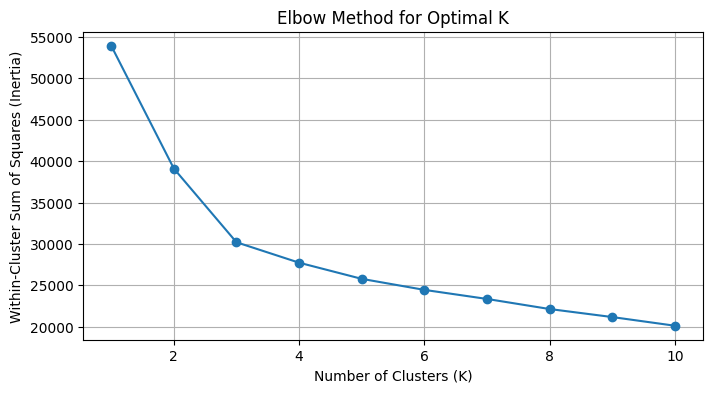

In [125]:
k_values = range(1, 11)
inertia_values = []

# Calculate the within-cluster sum of squares (inertia) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sacaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()

In [126]:
kmeans = KMeans(n_clusters=3)

# Fit KMeans to the data
kmeans.fit(sacaled)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_
clusters = kmeans.predict(sacaled)

C:\Users\ravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [127]:
clusters

array([1, 0, 1, ..., 1, 2, 2])

In [128]:
flat1['Furnished'] = clusters

In [129]:
flat2 = flat1.drop(['features_list','Type_of_Prperty'], axis=1)

In [130]:
flat2

,property_type,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,...,carpet,Build,BHK,Location,Other,servant,Store,Pooja,luxury_score,Furnished
0,flat,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",...,0,0,2,Krishna Colony,0,0,0,0,28,1
1,flat,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",...,0,0,2,Ashok Vihar,0,0,0,0,37,0
2,flat,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",...,0,0,2,Sohna,0,0,0,0,36,1
3,flat,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",...,0,0,2,Sector 61,0,0,0,0,76,1
4,flat,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",...,0,0,2,Sector 92,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,flat,ansal heights 86,1.05,5541.0,Super Built up area 1895(176.05 sq.m.),3,3,3,servant room,"Tower C, Sector 86 Gurgaon, Gurgaon, Haryana",...,0,0,3,Sector 86,0,1,0,0,0,1
2993,flat,parsvnath green ville,3.30,9984.0,Super Built up area 3905(362.79 sq.m.)Built Up...,5,5,3+,servant room,"Sector 48 Gurgaon, Gurgaon, Haryana",...,0,Built Up area: 3305 sq.ft.,5,Sector 48,0,1,0,0,71,1
2994,flat,raheja vedaanta,0.95,5214.0,Super Built up area 1822(169.27 sq.m.),3,3,3,others,"Sector 108 Gurgaon, Gurgaon, Haryana",...,0,0,3,Sector 108,1,0,0,0,95,1
2995,flat,ambience lagoon,5.80,12500.0,Built Up area: 3700 (343.74 sq.m.),3,4,3+,"pooja room,study room,servant room,others","Gurgaon, DLF Phase 3, Gurgaon, Haryana",...,0,0,3,DLF Phase 3,1,1,0,1,68,2


# Property age

In [131]:
age = []

In [132]:
for i in flat['agePossession']:
    if i == '10+ Year Old':
        age.append('very old')
    elif i == '5 to 10 Year Old':
        age.append('old')
    elif i == '0 to 1 Year Old':
        age.append('new')
    elif i == '1 to 5 Year Old':
        age.append('moderate')
    elif i == 'Within 6 months':
        age.append('new')
    elif i == 'Within 3 months':
        age.append('new')
    elif i == 'undefined':
        age.append('unknown')
    elif i == 0:
        age.append('unknown')
        
    elif i == 'By 2023':
        age.append('new')
    elif i == 'Sep 2023':
        age.append('new')
    elif i == 'Aug 2023':
        age.append('new')
    elif i == 'Nov 2023':
        age.append('new')
    elif i == 'Sep 2023':
        age.append('new')
    elif i == 'Oct 2023':
        age.append('new')

    elif i == 'Dec 2023':
        age.append('new')  
    else:
        age.append('under construction')
        
     
        
        


In [133]:
flat2['agePossession'] = age

In [134]:
flat2['agePossession']

0                 moderate
1                 very old
2                      new
3                      new
4       under construction
               ...        
2992    under construction
2993              very old
2994              moderate
2995              very old
2996              moderate
Name: agePossession, Length: 2997, dtype: object

# other

In [149]:
flat2.head(2)

,property_type,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,...,Build,BHK,Location,Other,servant,Store,Pooja,luxury_score,Furnished,price_square
0,flat,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",...,0,2,Krishna Colony,0,0,0,0,28,0,900.000000
1,flat,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",...,0,2,Ashok Vihar,0,0,0,0,37,2,650.026001


In [135]:
flat2['price_square'] = (flat2['price']*10000000) / flat2['price_per_sqft']

In [136]:
a = flat2['areaWithType'].str.split(')').str.get(0)
b = flat2['areaWithType'].str.split(')').str.get(1)
c = flat2['areaWithType'].str.split(')').str.get(2)
d = flat2['areaWithType'].str.split(')').str.get(3)
e = flat2['areaWithType'].str.split(')').str.get(4)

In [137]:
a

0               Carpet area: 900 (83.61 sq.m.
1               Carpet area: 650 (60.39 sq.m.
2               Carpet area: 595 (55.28 sq.m.
3             Carpet area: 1200 (111.48 sq.m.
4       Super Built up area 1345(124.95 sq.m.
                        ...                  
2992    Super Built up area 1895(176.05 sq.m.
2993    Super Built up area 3905(362.79 sq.m.
2994    Super Built up area 1822(169.27 sq.m.
2995        Built Up area: 3700 (343.74 sq.m.
2996    Super Built up area 3123(290.14 sq.m.
Name: areaWithType, Length: 2997, dtype: object

In [138]:
super1 = []

In [139]:
for i in a:
    if 'Super' in i:
        super1.append(i)
    else:
        super1.append(0)

In [140]:
Carpet1 = []

In [141]:
for i in a:
    if 'Carpet' in i:
        Carpet1.append(i)
    else:
        Carpet1.append(0)

In [142]:
Built1 = []

In [143]:
for i in a:
    if 'Built' in i and 'Super' not in i:
        Built1.append(i)
    else:
        Built1.append(0)

In [144]:
super11 = pd.DataFrame(super1)

Carpet11 = pd.DataFrame(Carpet1)

Built11 = pd.DataFrame(Built1)

In [145]:
for index, value in enumerate(b):
    if isinstance(value, str) and 'Super' in value:
        super11[0].loc[index] = value


In [146]:
for index, value in enumerate(b):
    if isinstance(value, str) and 'Built' in value and 'Super' not in value:
        Built11[0].loc[index] = value


In [147]:
for index, value in enumerate(b):
    if isinstance(value, str) and 'Carpet' in value:
        Carpet11[0].loc[index] = value


In [148]:
for index, value in enumerate(c):
    if isinstance(value, str) and 'Super' in value:
        super11[0].loc[index] = value
        
for index, value in enumerate(c):
    if isinstance(value, str) and 'Built' in value and 'Super' not in value:
        Built11[0].loc[index] = value

for index, value in enumerate(c):
    if isinstance(value, str) and 'Carpet' in value:
        Carpet11[0].loc[index] = value


In [149]:
for index, value in enumerate(d):
    if isinstance(value, str) and 'Super' in value:
        super11[0].loc[index] = value
        
for index, value in enumerate(d):
    if isinstance(value, str) and 'Built' in value and 'Super' not in value:
        Built11[0].loc[index] = value

for index, value in enumerate(d):
    if isinstance(value, str) and 'Carpet' in value:
        Carpet11[0].loc[index] = value


In [150]:
for index, value in enumerate(e):
    if isinstance(value, str) and 'Super' in value:
        super11[0].loc[index] = value
        
for index, value in enumerate(e):
    if isinstance(value, str) and 'Built' in value and 'Super' not in value:
        Built11[0].loc[index] = value

for index, value in enumerate(e):
    if isinstance(value, str) and 'Carpet' in value:
        Carpet11[0].loc[index] = value


In [151]:
super11 = pd.DataFrame(super1)

Carpet11 = pd.DataFrame(Carpet1)

Built11 = pd.DataFrame(Built1)

In [152]:
flat2['super1'] = super11
flat2['carpet1'] = Carpet11
flat2['Bulit'] = Built11

In [153]:
flat2['carpet1'] = flat2['carpet1'].str.replace('Carpet area:', '')

In [154]:
flat2

,property_type,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,...,Other,servant,Store,Pooja,luxury_score,Furnished,price_square,super1,carpet1,Bulit
0,flat,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",...,0,0,0,0,28,1,900.000000,0,900 (83.61 sq.m.,0
1,flat,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",...,0,0,0,0,37,0,650.026001,0,650 (60.39 sq.m.,0
2,flat,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",...,0,0,0,0,36,1,595.060994,0,595 (55.28 sq.m.,0
3,flat,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",...,0,0,0,0,76,1,1200.000000,0,1200 (111.48 sq.m.,0
4,flat,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",...,0,0,0,0,0,1,1345.119139,Super Built up area 1345(124.95 sq.m.,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,flat,ansal heights 86,1.05,5541.0,Super Built up area 1895(176.05 sq.m.),3,3,3,servant room,"Tower C, Sector 86 Gurgaon, Gurgaon, Haryana",...,0,1,0,0,0,1,1894.964808,Super Built up area 1895(176.05 sq.m.,NaN,0
2993,flat,parsvnath green ville,3.30,9984.0,Super Built up area 3905(362.79 sq.m.)Built Up...,5,5,3+,servant room,"Sector 48 Gurgaon, Gurgaon, Haryana",...,0,1,0,0,71,1,3305.288462,Super Built up area 3905(362.79 sq.m.,NaN,0
2994,flat,raheja vedaanta,0.95,5214.0,Super Built up area 1822(169.27 sq.m.),3,3,3,others,"Sector 108 Gurgaon, Gurgaon, Haryana",...,1,0,0,0,95,1,1822.017645,Super Built up area 1822(169.27 sq.m.,NaN,0
2995,flat,ambience lagoon,5.80,12500.0,Built Up area: 3700 (343.74 sq.m.),3,4,3+,"pooja room,study room,servant room,others","Gurgaon, DLF Phase 3, Gurgaon, Haryana",...,1,1,0,1,68,2,4640.000000,0,NaN,Built Up area: 3700 (343.74 sq.m.


In [155]:
filename = 'flat_data1.csv'

flat2.to_csv(filename, index=False)